## Imports

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Import Data for 10 Runs

In [118]:
data_array = []
for i in range(10):
    df = pd.read_csv('results_scratch_run{}.csv'.format(i+1))
    df.rename(columns={'Training Time': 'Training_Time', 'Num Cores': 'Num_Cores', 'Num Datapoints': 'Num_Datapoints',
                   'Num Trees': 'Num_Trees', 'Max Depth': 'Max_Depth', 'Score': 'Score',
                   'FeaturesPerTree': 'FeaturesPerTree', 'Criterion': 'Criterion', 'Num_features': 'Num_Features'}, inplace=True)
    #df['Score'] = np.nan
    df.convert_dtypes(convert_string=True)
    df.FeaturesPerTree = df.FeaturesPerTree.str.lstrip()
    df.Criterion = df.Criterion.str.lstrip()
    df.dropna(axis=1, inplace=True)
    data_array.append(df)
data_array[0].head()


Run Number  Training_Time  Num_Cores  Num_Datapoints  Num_Trees  Max_Depth  \
0           1       0.127349          1            8182          1          1   
1           2       0.122697          1            8182          1         10   
2           3       0.127438          1            8182          1        100   
3           4       0.322033          1            8182          8          1   
4           5       0.423570          1            8182          8         10   

   Score FeaturesPerTree Criterion  Num_Features  
0  0.661            sqrt      gini             4  
1  0.738            sqrt      gini             4  
2  0.729            sqrt      gini             4  
3  0.661            sqrt      gini             4  
4  0.783            sqrt      gini             4

## Import Data for the 16 Core run

In [119]:
df16 = pd.read_csv('results_scratch_16.csv')
df16.rename(columns={'Run Number': 'Run_Number', 'Training Time': 'Training_Time', 'Num Cores': 'Num_Cores', 'Num Datapoints': 'Num_Datapoints',
                   'Num Trees': 'Num_Trees', 'Max Depth': 'Max_Depth', 'Score': 'Score',
                   'FeaturesPerTree': 'FeaturesPerTree', 'Criterion': 'Criterion', 'Num_features': 'Num_Features'}, inplace=True)
df16.head()
#df16.query('Run_Number == 2')

Run_Number  Training_Time  Num_Cores  Num_Datapoints  Num_Trees  Max_Depth  \
0           1      64.244256         16          654590         64        100   
1           2      61.577516         16          654590         64        100   
2           3      62.396626         16          654590         64        100   
3           4      63.265701         16          654590         64        100   
4           5      64.941567         16          654590         64        100   

   Score FeaturesPerTree Criterion  Num_Features  
0  0.794            sqrt      gini            19  
1  0.783            sqrt      gini            19  
2  0.782            sqrt      gini            19  
3  0.764            sqrt      gini            19  
4  0.786            sqrt      gini            19

## Functions for Efficiency and Speedup

In [120]:
def calculate_efficiency(df, df16):
    test_df = df[(df.Max_Depth == 100) & (df.Num_Features == 19) &
                 (df.Num_Datapoints == 654590) & (df.Num_Trees == 64)]
    Core1 = test_df.query('Num_Cores == 1')
    Core4 = test_df.query('Num_Cores == 4')
    Core8 = test_df.query('Num_Cores == 8')
    #Core16 = test_df.query('Num_Cores == 16')
    speedup1 = Core1.Training_Time.values / Core4.Training_Time.values
    # print("Efficiency for 4 cores is {:.4}".format(speedup1[0] / 4))
    speedup2 = Core1.Training_Time.values / Core8.Training_Time.values
    # print("Efficiency for 8 cores is {:.4}".format(speedup2[0] / 8))
    speedup3 = Core1.Training_Time.values / df16.Training_Time.values
    return 1, speedup1[0] / 4, speedup2[0] / 8, speedup3[0] / 16

In [121]:
def calculate_speedup(df, df16):
    test_df = df[(df.Max_Depth == 100) & (df.Num_Features == 19) &
                 (df.Num_Datapoints == 654590) & (df.Num_Trees == 64)]
    Core1 = test_df.query('Num_Cores == 1')
    Core4 = test_df.query('Num_Cores == 4')
    Core8 = test_df.query('Num_Cores == 8')
    #Core16 = test_df.query('Num_Cores == 16')
    speedup1 = Core1.Training_Time.values / Core4.Training_Time.values
    # print("Efficiency for 4 cores is {:.4}".format(speedup1[0] / 4))
    speedup2 = Core1.Training_Time.values / Core8.Training_Time.values
    # print("Efficiency for 8 cores is {:.4}".format(speedup2[0] / 8))
    speedup3 = Core1.Training_Time.values / df16.Training_Time.values
    return 1, speedup1[0], speedup2[0], speedup3[0]

In [122]:
def calculate_efficiency2(df):
    test_df = df[(df.Max_Depth == 100) & (df.Num_Features == 19) &
                 (df.Num_Datapoints == 654590) & (df.Num_Trees == 64)]
    Core1 = test_df.query('Num_Cores == 1')
    Core4 = test_df.query('Num_Cores == 4')
    Core8 = test_df.query('Num_Cores == 8')
    speedup1 = Core1.Training_Time.values / Core4.Training_Time.values
    # print("Efficiency for 4 cores is {:.4}".format(speedup1[0] / 4))
    speedup2 = Core1.Training_Time.values / Core8.Training_Time.values
    # print("Efficiency for 8 cores is {:.4}".format(speedup2[0] / 8))
    return 1, speedup1[0] / 4, speedup2[0] / 8

## Efficiency using just 1,4,8 Cores - for other models

In [123]:
speedup=[]
for i in range(10):
    speedup.append(calculate_efficiency2(data_array[i]))
speedup = np.array(speedup)
speedup_mean = []
speedup_std_error = []
speedup_mean.extend(speedup.mean(axis=0))
speedup_std_error.extend(speedup.std(axis=0)/np.sqrt(len(speedup)))
cores = [1,4,8]
print(speedup_mean)
print(speedup_std_error)
df_speed = pd.DataFrame(columns=['Num_of_Cores', 'Efficiency', 'Std_Error'])
df_speed.Num_of_Cores = cores
df_speed.Efficiency = speedup_mean
df_speed.Std_Error = speedup_std_error
df_speed.head()

[1.0, 0.926065282164409, 0.8093912085913075]
[0.0, 0.0031501277873301407, 0.004935023550846377]


Num_of_Cores  Efficiency  Std_Error
0             1    1.000000   0.000000
1             4    0.926065   0.003150
2             8    0.809391   0.004935

## Efficiency for 1,4,8,16 Cores with Mean & Error Calcs

In [124]:
speedup=[]
for i in range(10):
    speedup.append(calculate_efficiency(data_array[i], df16.query('Run_Number == {}'.format(i+1))))
speedup = np.array(speedup)
speedup_mean = []
speedup_std_error = []
speedup_mean.extend(speedup.mean(axis=0))
speedup_std_error.extend(speedup.std(axis=0)/np.sqrt(len(speedup)))
cores = [1,4,8,16]
print(speedup_mean)
print(speedup_std_error)
df_speed = pd.DataFrame(columns=['Num_of_Cores', 'Efficiency', 'Std_Error'])
df_speed.Num_of_Cores = cores
df_speed.Efficiency = speedup_mean
df_speed.Std_Error = speedup_std_error
df_speed.head()

[1.0, 0.926065282164409, 0.8093912085913075, 0.5940352668507931]
[0.0, 0.0031501277873301407, 0.004935023550846377, 0.003970174741129612]


Num_of_Cores  Efficiency  Std_Error
0             1    1.000000   0.000000
1             4    0.926065   0.003150
2             8    0.809391   0.004935
3            16    0.594035   0.003970

## Efficiency for 1,4,8,16 Cores redone for Seaborn plotting

In [125]:
eff=[]
for i in range(10):
    eff.extend(calculate_efficiency(data_array[i], df16.query('Run_Number == {}'.format(i+1))))
#speedup = np.array(speedup)
#speedup_mean = [1]
#speedup_std_error = [0]
#speedup_mean.extend(speedup.mean(axis=0))
#speedup_std_error.extend(speedup.std(axis=0)/np.sqrt(len(speedup)))
cores = []
for i in range(10):
    cores.extend([1,4,8,16])
program = []
for i in range(40):
    program.append("PRFwSKLDT")
eff = zip(cores, eff, program)
#print(speedup_mean)
#print(speedup_std_error)
df_eff = pd.DataFrame(eff, columns=['Num_of_Cores', 'Efficiency', 'Program'])
#df_speed.Num_of_Cores = cores
#df_speed.Efficiency = speedup
#df_speed.Std_Error = speedup_std_error
df_eff.head()

Num_of_Cores  Efficiency    Program
0             1    1.000000  PRFwSKLDT
1             4    0.939530  PRFwSKLDT
2             8    0.798284  PRFwSKLDT
3            16    0.583456  PRFwSKLDT
4             1    1.000000  PRFwSKLDT

## Speedup for 1,4,8,16 Cores redone for Seaborn plotting

In [126]:
speedup=[]
for i in range(10):
    speedup.extend(calculate_speedup(data_array[i], df16.query('Run_Number == {}'.format(i+1))))
#speedup = np.array(speedup)
#speedup_mean = [1]
#speedup_std_error = [0]
#speedup_mean.extend(speedup.mean(axis=0))
#speedup_std_error.extend(speedup.std(axis=0)/np.sqrt(len(speedup)))
cores = []
for i in range(10):
    cores.extend([1,4,8,16])
program = []
for i in range(40):
    program.append("PRFwSKLDT")
speedup = zip(cores, speedup, program)
#print(speedup_mean)
#print(speedup_std_error)
df_speed = pd.DataFrame(speedup, columns=['Num_of_Cores', 'Speedup', 'Program'])
#df_speed.Num_of_Cores = cores
#df_speed.Efficiency = speedup
#df_speed.Std_Error = speedup_std_error
df_speed.head()

Num_of_Cores   Speedup    Program
0             1  1.000000  PRFwSKLDT
1             4  3.758119  PRFwSKLDT
2             8  6.386270  PRFwSKLDT
3            16  9.335298  PRFwSKLDT
4             1  1.000000  PRFwSKLDT

## Speedup Plot

Text(0.5, 1.0, 'Multiprocessing Speedup on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')

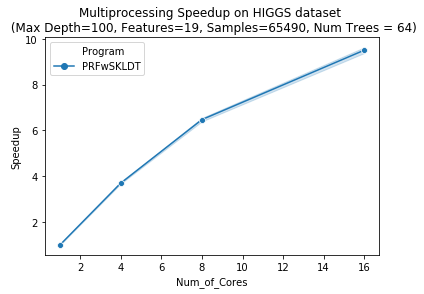

In [127]:
sns.lineplot(x='Num_of_Cores', y='Speedup', data=df_speed, hue="Program", style="Program", markers=True).set_title('Multiprocessing Speedup on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')

## Efficiency Plot

Text(0.5, 1.0, 'Multiprocessing Efficiency on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')

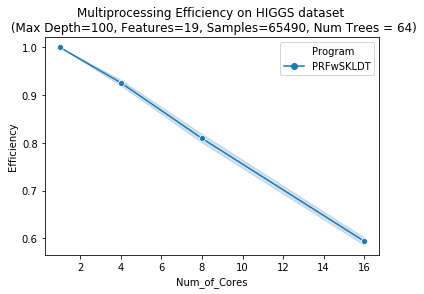

In [128]:
sns.lineplot(x='Num_of_Cores', y='Efficiency', data=df_eff, hue="Program", style="Program", markers=True).set_title('Multiprocessing Efficiency on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')


## Create Combined DataFrame

In [129]:
df_c = pd.DataFrame(columns=data_array[0].columns)
for i in range(10):
    df_c = df_c.append(data_array[i], ignore_index=True)
df_c.head()

Run Number  Training_Time Num_Cores Num_Datapoints Num_Trees Max_Depth  \
0          1       0.127349         1           8182         1         1   
1          2       0.122697         1           8182         1        10   
2          3       0.127438         1           8182         1       100   
3          4       0.322033         1           8182         8         1   
4          5       0.423570         1           8182         8        10   

   Score FeaturesPerTree Criterion Num_Features  
0  0.661            sqrt      gini            4  
1  0.738            sqrt      gini            4  
2  0.729            sqrt      gini            4  
3  0.661            sqrt      gini            4  
4  0.783            sqrt      gini            4

## Training Time vs Samples

[None, None]

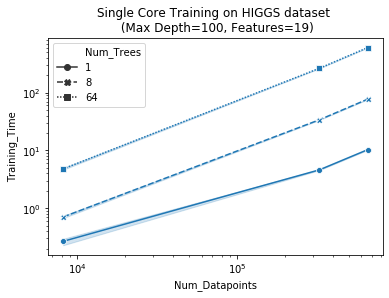

In [130]:
myPlot = sns.lineplot(x="Num_Datapoints", y='Training_Time', data=df_c.query('Num_Cores == 1 & Num_Features == 19 & Max_Depth == 100'), style='Num_Trees', markers=True)
myPlot.set_title('Single Core Training on HIGGS dataset \n (Max Depth=100, Features=19)')
myPlot.set(xscale="log", yscale="log")

## Calculate Logs for Line Fitting

In [131]:
df_c["log_time"] = np.log(df_c["Training_Time"])
df_c["log_features"] = np.log(df_c["Num_Features"].astype("float"))
df_c["log_sample"] = np.log(df_c["Num_Datapoints"].astype("float"))
df_c["log_trees"] = np.log(df_c["Num_Trees"].astype("float"))


## Performance Calcs

In [132]:
complexity_results = []
core_config = [1,4,8]
for i in core_config:
    myData = df_c.query('Num_Cores == {} & Num_Trees == 64 & Max_Depth == 100 & Num_Datapoints == 654590'.format(i))
    complexity_results.append(stats.linregress(x=myData["log_features"], y=myData["log_time"]))
    myData = df_c.query('Num_Cores == {} & Num_Trees == 64 & Max_Depth == 100 & Num_Features == 19'.format(i))
    complexity_results.append(stats.linregress(x=myData["log_sample"], y=myData["log_time"]))
    myData = df_c.query('Num_Cores == {} & Num_Datapoints == 654590 & Max_Depth == 100 & Num_Features == 19 & Num_Trees > 1'.format(i))
    complexity_results.append(stats.linregress(x=myData["log_trees"], y=myData["log_time"]))

for i in range(3):
    print("For {} Core the computational complexity* is O(p**{:.3} n**{:.3} Trees**{:.3})".format(
        core_config[i], complexity_results[3*i].slope, complexity_results[3*i+1].slope, complexity_results[3*i+2].slope))




For 1 Core the computational complexity* is O(p**0.298 n**1.1 Trees**0.988)
For 4 Core the computational complexity* is O(p**0.304 n**1.08 Trees**0.949)
For 8 Core the computational complexity* is O(p**0.33 n**1.05 Trees**0.853)


## Training Time vs. Features

[None, None]

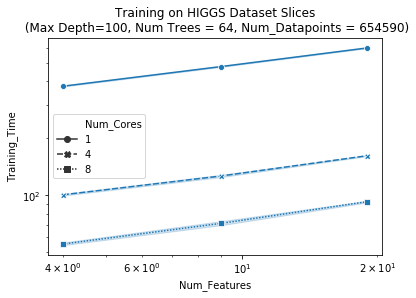

In [133]:
myPlot = sns.lineplot(x="Num_Features", y='Training_Time', data=df_c.query('Num_Trees == 64 & Max_Depth == 100 & Num_Datapoints == 654590'), style='Num_Cores', markers=True)
myPlot.set_title('Training on HIGGS Dataset Slices\n (Max Depth=100, Num Trees = 64, Num_Datapoints = 654590)')
myPlot.set(xscale="log", yscale="log")

## Training Time vs Trees

[None, None]

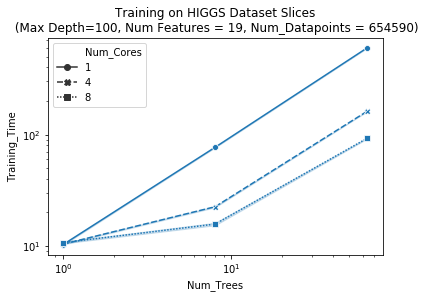

In [134]:
myPlot = sns.lineplot(x="Num_Trees", y='Training_Time', data=df_c.query('Num_Features == 19 & Max_Depth == 100 & Num_Datapoints == 654590'), style='Num_Cores', markers=True)
myPlot.set_title('Training on HIGGS Dataset Slices\n (Max Depth=100, Num Features = 19, Num_Datapoints = 654590)')
myPlot.set(xscale="log", yscale="log")

Note that since this was parallelized on the scope of trees, it is expected that 1 tree should see no improvement between number of cores.

## Model Scores on Validation Data

In [135]:
data=df_c.query('Num_Features == 19 & Max_Depth == 100 & Num_Datapoints == 654590 & Num_Trees == 64')
print('Features = 19 & Max Depth = 100 & Samples = 654590 & Trees = 64')
print("Mean Error Rate is {:.4}".format(1 - data.Score.mean()))

Features = 19 & Max Depth = 100 & Samples = 654590 & Trees = 64
Mean Error Rate is 0.1856


## Comparisons

array([8182, 327295, 654590], dtype=object)

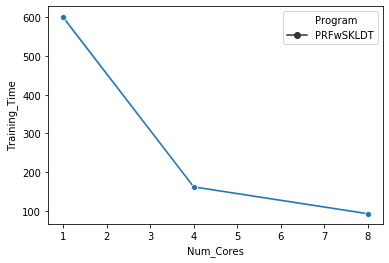

In [136]:
program = ["PRFwSKLDT"]*df_c.shape[0]
df_c["Program"] = program
myPlot = sns.lineplot(x="Num_Cores", y='Training_Time', data=df_c.query('Num_Features == 19 & Num_Trees == 64 & Max_Depth == 100 & Num_Datapoints == 654590'), style="Program", markers=True)
df_c.Num_Datapoints.unique()

In [138]:
data_c=df_c.query('Num_Features == 19 & Max_Depth == 100 & Num_Datapoints == 654590 & Num_Trees == 64')
#data_c.Training_Time

## Import Scikit-learn RFClassifier Runs

In [154]:
data_array = []
for i in range(10):
    df = pd.read_csv('./sklearn_results/results_sklearn_run{}.csv'.format(i+1))
    df.rename(columns={'Training Time': 'Training_Time', 'Num Cores': 'Num_Cores', 'Num Datapoints': 'Num_Datapoints',
                   'Num Trees': 'Num_Trees', 'Max Depth': 'Max_Depth', 'Score': 'Score',
                   'FeaturesPerTree': 'FeaturesPerTree', 'Criterion': 'Criterion', 'Num_features': 'Num_Features'}, inplace=True)
    #df['Score'] = np.nan
    df.convert_dtypes(convert_string=True)
    df.FeaturesPerTree = df.FeaturesPerTree.str.lstrip()
    df.Criterion = df.Criterion.str.lstrip()
    df.dropna(axis=1, inplace=True)
    data_array.append(df)
data_array[0].head()


Run Number  Training_Time  Num_Cores  Num_Datapoints  Num_Trees  Max_Depth  \
0           1       0.028147          1            8182          1          1   
1           2       0.033478          1            8182          1         10   
2           3       0.037971          1            8182          1        100   
3           4       0.065181          1            8182          8          1   
4           5       0.152462          1            8182          8         10   

   Score FeaturesPerTree Criterion  Num_Features  
0  0.669            sqrt      gini             4  
1  0.734            sqrt      gini             4  
2  0.711            sqrt      gini             4  
3  0.663            sqrt      gini             4  
4  0.788            sqrt      gini             4

In [155]:
df_c2 = pd.DataFrame(columns=data_array[0].columns)
for i in range(10):
    df_c2 = df_c2.append(data_array[i], ignore_index=True)
df_c2.head()

Run Number  Training_Time Num_Cores Num_Datapoints Num_Trees Max_Depth  \
0          1       0.028147         1           8182         1         1   
1          2       0.033478         1           8182         1        10   
2          3       0.037971         1           8182         1       100   
3          4       0.065181         1           8182         8         1   
4          5       0.152462         1           8182         8        10   

   Score FeaturesPerTree Criterion Num_Features  
0  0.669            sqrt      gini            4  
1  0.734            sqrt      gini            4  
2  0.711            sqrt      gini            4  
3  0.663            sqrt      gini            4  
4  0.788            sqrt      gini            4

## Efficiency using just 1,4,8 Cores 

In [140]:
eff2=[]
for i in range(10):
    eff2.extend(calculate_efficiency2(data_array[i]))
#speedup = np.array(speedup)
#speedup_mean = [1]
#speedup_std_error = [0]
#speedup_mean.extend(speedup.mean(axis=0))
#speedup_std_error.extend(speedup.std(axis=0)/np.sqrt(len(speedup)))
cores = []
for i in range(10):
    cores.extend([1,4,8])
program = []
for i in range(30):
    program.append("SklearnRFClassifier")
eff2 = zip(cores, eff2, program)
#print(speedup_mean)
#print(speedup_std_error)
df_eff2 = pd.DataFrame(eff2, columns=['Num_of_Cores', 'Efficiency', 'Program'])
#df_speed.Num_of_Cores = cores
#df_speed.Efficiency = speedup
#df_speed.Std_Error = speedup_std_error
df_eff2.head()

Num_of_Cores  Efficiency              Program
0             1    1.000000  SklearnRFClassifier
1             4    0.873590  SklearnRFClassifier
2             8    0.735404  SklearnRFClassifier
3             1    1.000000  SklearnRFClassifier
4             4    0.883005  SklearnRFClassifier

In [141]:
df_eff_comb =  df_eff.append(df_eff2, ignore_index=True)
df_eff_comb.head()

Num_of_Cores  Efficiency    Program
0             1    1.000000  PRFwSKLDT
1             4    0.939530  PRFwSKLDT
2             8    0.798284  PRFwSKLDT
3            16    0.583456  PRFwSKLDT
4             1    1.000000  PRFwSKLDT

Text(0.5, 1.0, 'Multiprocessing Efficiency on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')

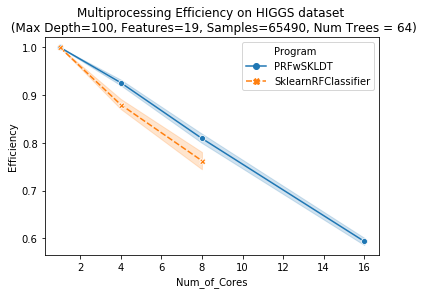

In [142]:
sns.lineplot(x='Num_of_Cores', y='Efficiency', data=df_eff_comb, hue="Program", style="Program", markers=True).set_title('Multiprocessing Efficiency on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')

In [143]:
data_array = []
for i in range(10):
    df = pd.read_csv('rfsrc_rn{}.csv'.format(i+1))
    df.rename(columns={'time': 'Training_Time', 'core': 'Num_Cores', 'data_num': 'Num_Datapoints',
                 'tr': 'Num_Trees', 'depth': 'Max_Depth', 'obb': 'Score' }, inplace=True)
    df['Score'] = np.nan
    #df.convert_dtypes(convert_string=True)
    #df.FeaturesPerTree = df.FeaturesPerTree.str.lstrip()
    #df.Criterion = df.Criterion.str.lstrip()
    df.dropna(axis=1, inplace=True)
    data_array.append(df)
data_array[0].head()



Num_Datapoints  Num_Trees  Max_Depth  Training_Time  Num_Cores  \
0            8182          1          1          0.161          1   
1          327295          1          1          5.584          1   
2          654590          1          1         11.185          1   
3            8182          1         10          0.198          1   
4          327295          1         10          5.617          1   

   Num_Features  
0            19  
1            19  
2            19  
3            19  
4            19

In [144]:
eff3=[]
for i in range(10):
    eff3.extend(calculate_efficiency2(data_array[i]))
#speedup = np.array(speedup)
#speedup_mean = [1]
#speedup_std_error = [0]
#speedup_mean.extend(speedup.mean(axis=0))
#speedup_std_error.extend(speedup.std(axis=0)/np.sqrt(len(speedup)))
cores = []
for i in range(10):
    cores.extend([1,4,8])
program = []
for i in range(30):
    program.append("RFSRC")
eff3 = zip(cores, eff3, program)
#print(speedup_mean)
#print(speedup_std_error)
df_eff3 = pd.DataFrame(eff3, columns=['Num_of_Cores', 'Efficiency', 'Program'])
#df_speed.Num_of_Cores = cores
#df_speed.Efficiency = speedup
#df_speed.Std_Error = speedup_std_error
df_eff3.head()

Num_of_Cores  Efficiency Program
0             1    1.000000   RFSRC
1             4    0.516934   RFSRC
2             8    0.326883   RFSRC
3             1    1.000000   RFSRC
4             4    0.511208   RFSRC

In [145]:
df_eff_comb2 =  df_eff_comb.append(df_eff3, ignore_index=True)

Text(0.5, 1.0, 'Multiprocessing Efficiency on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')

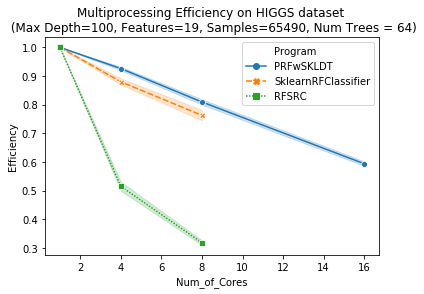

In [146]:
sns.lineplot(x='Num_of_Cores', y='Efficiency', data=df_eff_comb2, hue="Program", style="Program", markers=True).set_title('Multiprocessing Efficiency on HIGGS dataset \n (Max Depth=100, Features=19, Samples=65490, Num Trees = 64)')

In [96]:
df_c3 = pd.DataFrame(columns=data_array[0].columns)
for i in range(10):
    df_c3 = df_c3.append(data_array[i], ignore_index=True)
df_c3.head()

Num_Datapoints Num_Trees Max_Depth  Training_Time Num_Cores Num_Features
0           8182         1         1          0.161         1           19
1         327295         1         1          5.584         1           19
2         654590         1         1         11.185         1           19
3           8182         1        10          0.198         1           19
4         327295         1        10          5.617         1           19

In [97]:
df_c3.Num_Cores.unique()

array([1, 4, 8], dtype=object)

In [157]:
df_c3.query('Num_Features == 19 & Max_Depth == 100 & Num_Datapoints == 654590 & Num_Trees == 64 & Num_Cores == 8').Training_Time.mean()

21.260300000000004

In [158]:
df_c2.query('Num_Features == 19 & Max_Depth == 100 & Num_Datapoints == 654590 & Num_Trees == 64 & Num_Cores == 8').Training_Time.mean()

61.776908634137364

In [161]:
df_c.query('Num_Features == 19 & Max_Depth == 100 & Num_Datapoints == 654590 & Num_Trees == 64 & Num_Cores == 8').Training_Time.mean()

92.69179510837421